## Introduction

- In this notebook I wiil be trying to implement a neural network model from scratch, using only the basic libraries such as numpy.   
- By using basic libraries, I meant not using the pre-bulit neural-network(called NN hereafter) modelling libraries like Tensorlflow and Keras.   
- However in the end, I will be using them for cross-verifying the NN model that I built using sklearn and tensorflow libraries. 

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
sns.set(style = 'whitegrid')

## 2. Importing data-set

- I will be using the breast cancer data-set thats available on Kaggle and UCI machine learning repository.

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

- There are 33 features in the dataset including the target feature 'diagnosis'.
- There are 569 training samples.

In [6]:
df.id.nunique()

569

- As the feature id is having 100% unique values and is not contributing to the target variable, we will be setting it as the index.

In [7]:
df = df.set_index('id')

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Preprocessing and missing values

In [9]:
df.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

- There is a feature having 100% missing values.

In [10]:
df = df.drop('Unnamed: 32', axis = 1)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [13]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

- There are two classes in the output variable, 'M' for Malignant and 'B'for Benign.
- I will be replacing 'M' with 0 and 'B' with 1.

In [14]:
df.diagnosis = df.diagnosis.replace('M', 0)
df.diagnosis = df.diagnosis.replace('B', 1)

In [15]:
df.diagnosis.unique()

array([0, 1])

## 4. Dividing data into train and test sets

- I will be using sklearn's train_test_split to divide the data into train and test data.

In [16]:
x = np.array(df.drop('diagnosis', axis = 1))

In [17]:
y = np.array(df.diagnosis)

In [18]:
y = y.reshape(len(y), 1)

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 42)

- I am going to standardize the dataset using StandardScaler from sklearn.

In [20]:
scaler = preprocessing.StandardScaler()

In [21]:
scaler.fit(x_train)

StandardScaler()

In [22]:
x_train = scaler.transform(x_train)

In [23]:
x_test = scaler.transform(x_test)

## 5. Defining our neural network model

- I will be creating a NN class in which I will be defining the no. of layers, no. of nodes, learning rate, weights and biases.
- I am going to create a NN with 1 hidden layer, an input layer and output layer.
- The default layers will be 30 nodes for input layer, 14 nodes for hidden layer and 1 node for output layer.
- I am initializing the weight matrix with random numbers froma normal distribution. The bias weights are also initialized.
- I will be using the Sigmoid function as the activation function fo all the nodes.
- The cost function defined below is that of the logistic regression. It calculates the cost from the output of the NN and the actual label.
- The plot function is used to plot the cost as the iterations progresses.

In [24]:
class NeuralNet():
    def __init__(self, layers = [30, 14, 1], learning_rate = 0.001, iterations = 100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.Y = None
    def init_weights(self):
        np.random.seed(1)
        self.params['theta_1'] = np.random.randn(self.layers[0], self.layers[1])
        self.params['b1'] = np.random.randn(self.layers[1],)
        self.params['theta_2'] = np.random.randn(self.layers[1], self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2],)
    def sigmoid(self,z):
        return 1.0/(1.0 + np.exp(-z))
    def cost_fn(self, y, h):
        m = len(y)
        cost = (-1/m) * (np.sum(np.multiply(np.log(h), y) + np.multiply((1-y), np.log(1-h))))
        return cost
    def forward_prop(self):
        Z1 = self.X.dot(self.params['theta_1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['theta_2']) + self.params['b2']
        h = self.sigmoid(Z2)
        cost = self.cost_fn(self.Y, h)
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        return h, cost
    def back_propagation(self, h):
        diff_J_wrt_h = -(np.divide(self.Y, h) - np.divide((1 - self.Y), (1 - h)))
        diff_h_wrt_Z2 = h * (1 - h)
        diff_J_wrt_Z2 = diff_J_wrt_h * diff_h_wrt_Z2
        diff_J_wrt_A1 = diff_J_wrt_Z2.dot(self.params['theta_2'].T)
        diff_J_wrt_theta_2 = self.params['A1'].T.dot(diff_J_wrt_Z2)
        diff_J_wrt_b2 = np.sum(diff_J_wrt_Z2, axis = 0)
        diff_J_wrt_Z1 = diff_J_wrt_A1 * (self.params['A1'] * ((1-self.params['A1'])))
        diff_J_wrt_theta_1 = self.X.T.dot(diff_J_wrt_Z1)
        diff_J_wrt_b1 = np.sum(diff_J_wrt_Z1, axis = 0)
        self.params['theta_1'] = self.params['theta_1'] - self.learning_rate * diff_J_wrt_theta_1
        self.params['theta_2'] = self.params['theta_2'] - self.learning_rate * diff_J_wrt_theta_2
        self.params['b1'] = self.params['b1'] - self.learning_rate * diff_J_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * diff_J_wrt_b2
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.init_weights()
        for i in range(self.iterations):
            h, cost = self.forward_prop()
            self.back_propagation(h)
            self.cost.append(cost)
    def predict(self, X):
        Z1 = X.dot(self.params['theta_1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['theta_2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
    def acc(self, y, h):
        acc = (sum(y == h) / len(y) * 100)
        return acc
    def plot_cost(self):
        fig = plt.figure(figsize = (10,10))
        plt.plot(self.cost)
        plt.xlabel('No. of iterations')
        plt.ylabel('Logistic Cost')
        plt.show()

- Now that I have finised modelling the NN, its time to train it evaluate the performance.

## 6. Training and evaluating the model

In [25]:
nn = NeuralNet()

In [26]:
nn.fit(x_train, y_train)

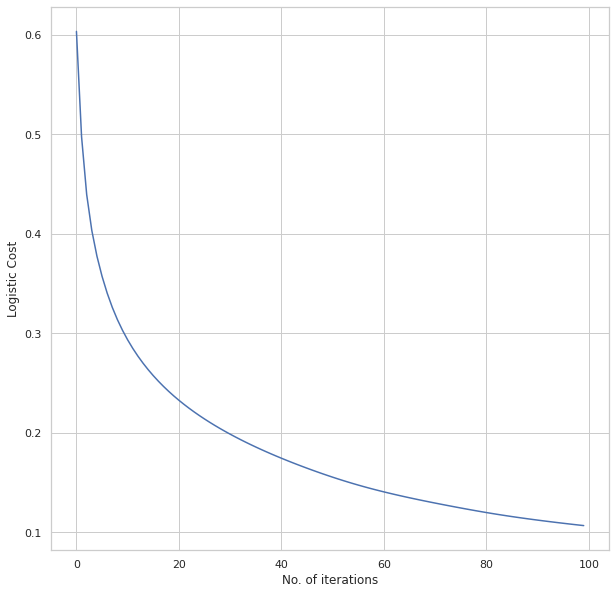

In [27]:
nn.plot_cost()

- From the plot, the cost is decreasing exponentially as the NN is being trained.

- The model can be evaluated by using the train and test accuracies.

In [28]:
train_pred = nn.predict(x_train)
test_pred = nn.predict(x_test)

In [29]:
print('Train accuracy: {}'.format(nn.acc(y_train, train_pred)))
print('Test accuracy: {}'.format(nn.acc(y_test, test_pred)))

Train accuracy: [97.14285714]
Test accuracy: [97.36842105]


- Lets check whether changing the parameters will bring any change in the performance of the model.

In [30]:
nn = NeuralNet(layers = [30, 20, 1], learning_rate = 0.01, iterations = 500)

In [31]:
nn.fit(x_train, y_train)

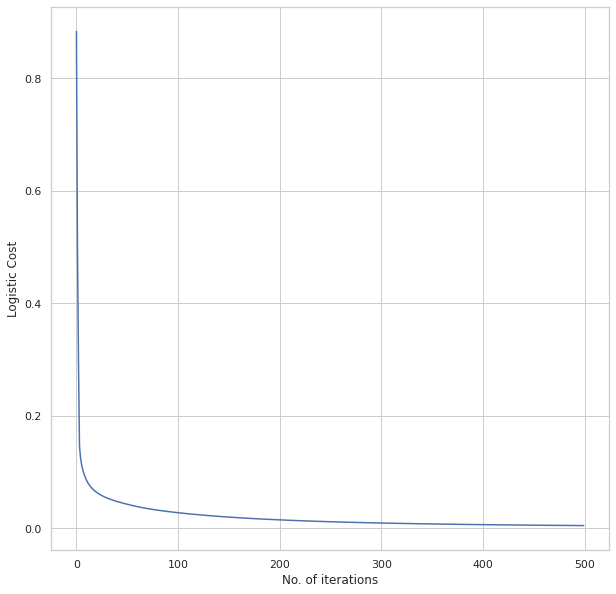

In [32]:
nn.plot_cost()

- The nodes in the hidden layer were increased from 14 to 20, learning rate decreased from 0.001 to 0.01 and the no. of iterations increased from 100 to 500.
- We can see from the plot that the total cost at the end of 500 iterations is lesser than the final cost in the previous case.

In [33]:
train_pred = nn.predict(x_train)
test_pred = nn.predict(x_test)

In [34]:
print('Train accuracy: {}'.format(nn.acc(y_train, train_pred)))
print('Test accuracy: {}'.format(nn.acc(y_test, test_pred)))

Train accuracy: [100.]
Test accuracy: [97.36842105]


- The train accuracy has reached 100% and the test accuracy has remained the same.

## 7. Cross-verifying with ready-made libraries 

### 7.1 Sklearn Neural Network classifier

- To cross verify my model, I will be using the sklearn's NN classifier.

In [35]:
sknet = MLPClassifier(hidden_layer_sizes = 14, learning_rate_init = 0.001, max_iter = 100)

- I have set the same parameters that I used above in my model.

In [36]:
sknet.fit(x_train, y_train)

/home/gokul/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gokul/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=14, max_iter=100)

In [37]:
pred_train = sknet.predict(x_train)
pred_test = sknet.predict(x_test)

In [38]:
print('Train accuracy = {}'.format(accuracy_score(pred_train, y_train)*100))
print('Test accuracy = {}'.format(accuracy_score(pred_test, y_test)*100))

Train accuracy = 97.8021978021978
Test accuracy = 97.36842105263158


- We can see that the train accuracy has increased slightly wheareas the test accuracy has remained the same.

### 7.2 Using Tensorflow Keras model 

- Another library that can be used to build NN easily is Tensorflow.
- I will be cross-verifying my model using a NN built by Tesnorflow Keras.

In [39]:
model = Sequential()
model.add(Dense(14, input_shape = (30,)))
model.add(Dense(1, activation = 'sigmoid'))

In [40]:
opt = Adam(learning_rate = 0.001)

In [41]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
model.fit(x_train, y_train, epochs = 100, verbose = 0)

In [43]:
train_acc = model.evaluate(x_train, y_train)[1]
test_acc = model.evaluate(x_test, y_test)[1]

4/4 [==============================] - 0s 741us/step - loss: 0.0511 - accuracy: 0.9825


In [44]:
print('Train accuracy = {}'.format(train_acc * 100))
print('Test accuracy = {}'.format(test_acc * 100))

Train accuracy = 98.90109896659851
Test accuracy = 98.24561476707458


- Both the train and test accuracies have increased slightly.

## 8. Summary

- Even thought we are getting slightly better accuracies while using Keras, we can say that the model built from scratch is on par with the Keras model.
- While using our model on large datasets, the training time will be quite large as we have not included any optimization techniques.
- In this case the Keras model can be trained faster than our model.